# Data Cleaning and Transformation
Data is collected and entered manually or automatically using various methods such as weather sensors, financial stock market data servers, users' online commerical preferences, etc. Collected data is not error-free and usually has various missing data points and erroneously entered data. For instance, online users might not want to enter their information because of privacy  concerns. Therefore, treating missing and noisy data (NA or NaN) is important for any data analysis processing. 

## Handling Missing Data
Missing data occurs commonly in many data analysis applications. One of the goals of pandas is to make working with missing data as painless as possible. For example, all of the the descriptive statistics on pandas objects exclude missing data by default. 

The way that missing data is represented in pandas objects is somewhat imperfect, but it is functional for a lot of users. For numeric data, pandas uses the floating-point value **NaN** <em>(Not a Number)</em> to represent missing data. We call this sentinel value that can be easily detected.

Pandas also adoped a convention used in the R programming language by referring to missing data as **NA** <em>(Not Available)</em>.

The following image shows the dataset with missing values that we will be working with:

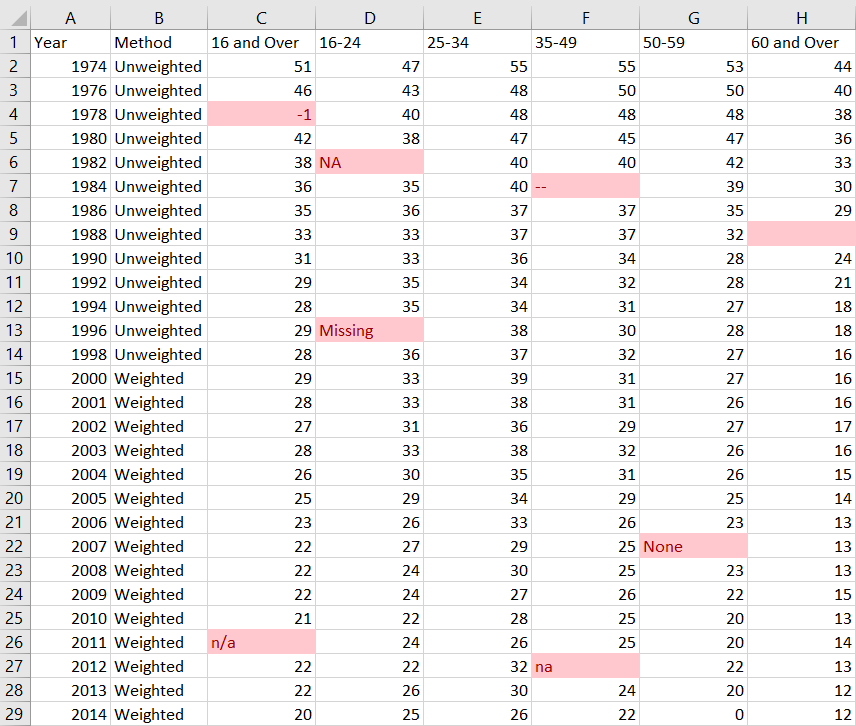

In this dataset, there are various different types of symbols to indicate missing values (Missing, -1, NA, --, <blank>, None, na, n/a etc).

In the practical, we will see how to handles these missing values. Let us start by importing the necessary libraries.

### Import libraries and Read Data

Notice that Pandas is able to detect some of the missing values but not all. Values in the data that are ```<blank>```, NA and n/a are detected as missing values but not the others.

By default, Pandas will consider the following symbols in the data to mean missing values:

```
‘’, #N/A, #N/A, N/A, #NA, -1.#IND, -1.#QNAN, -NaN, -nan, 1.#IND, 1.#QNAN, <NA>, N/A, NA, NULL, NaN, n/a, nan, null
```

In order for Pandas to detect all the missing values in our dataset, we can choose to use one of the recognised symbol in our dataset. However, if that is not possible, we can indicate to Pandas additional symbols using the ```na_values``` argument in the read_csv() function.

Use the ```na_values``` argument to load our dataset.

The ```na_values``` argument in the above code specifies that values in the dataset that is one of the "n/a", "na", "--", "Missing", "-1", "None" values are to be treated as missing value.

You should be able to see that our dataset now has all the 8 missing values indicated as ```NaN```. This shows that Pandas has recognised and detected those missing values.

We can also get Pandas's  ```isnull()``` function to print out the locations of the missing values. Use the following codes to print out missing values in the data frame:

You should see a 2D array of ```True``` and ```False``` values. Detected missing values will be indicated as ```True```.

We can also print a summary of the number of missing values in the dataset using ```sum()```

We can also programmatically set a value to be a missing value. This is useful if we need to set a value as missing value _only if a certain condition is met_. 

For example, for year 2014 and column ```50-59```, the number is indicated as 0. This can certainly be a legitmate value, but suppose that 0 is also used to indicate missing value __only in this column__ and not the rest. In this case, we cannot use the ```na_values``` argument as before, otherwise, all input values 0.0 will be treated as missing value. 

In such cases, we can simply replace the 0.0 value with ```np.nan``` to indicate a missing value.

The above code assign a missing value (```np.nan```) to any value in the ```50-59``` column that has a value of 0.

### Exercise

Print out a summary of the number of missing values, we should have a total of 9.


### Delete Examples or Features

The simplest way is to remove either the examples (rows) or the features (columns) with the missing values. Pandas provides the function  ```dropna()``` that can conveniently drop rows or columns with missing values.

We indicate the "index" for the axis argument in the ```dropna()``` function, this will cause it to remove examples (rows) instead of columns that contain missing values.

axis:
* 0, or ‘index’ : Drop rows which contain missing values
* 1, or ‘columns’ : Drop columns which contain missing value

We can see that orginally we have 28 rows but after the ```dropna()``` function call, we are left with 19, the 9 rows with missing values have been removed.

Sometimes, most of the missing values concentrate in a particular feature. In such cases, it might be better to drop the feature instead of examples. This is especially true in cases where the feature itself is not very important.

### Exercise

To drop column, instead of calling ```dropna(axis="index")```, use ```dropna(axis="columns")``` instead. Try it and see that columns with missing values are dropped.

You should see only the ```Year```, ```Method``` and ```25-34``` features are left and we still have a total of 28 rows.


## Replacing with Values
Rather than filtering out missing data (and potentially discarding other data along with it), you may want to fill in the "holes" in any number of ways. For example, we can fill all missing values with 125 say. To do that, we can use the ```fillna()``` method provided by Pandas.

Of course replacing it with an arbitrary value of 125 is not really a smart move. We should fill it with values that are more representative of the feature. We can choose to replace the missing value with either the ```average``` or the ```median``` of the feature.

Instead of replacing with aribtrary value of 125, we will replace the missing values with the mean value of the __16 and Over__ column.

### Exercise

Repeat the above but this time replace the missing value with the median value.

Hint: The median value should be 28.0 for column "16 and Over".

You can use a different fill value for each column using a dictionary.

## k-NN Imputation

Replacing missing values with the average or median values is probably a better move then assigning them with a random number. However, I think we can do even better. We can use the k-NN imputation. The word _imputation_ means the process of substituting the missing values with other values.

The idea of k-NN imputation is that when there is a missing value in a data example, we can replace the missing values with one from one or more __similar__ examples. We find the nearest neighbour (that is, another row that is most similar to the row with missing value) and use the value from the nearest neighbour as a substitutional value. It is possible to use more than one neighbours' values to use as subtitutional value, the k in k-NN refers to the the number of neighbours we use. When k > 1, we find the values of the k nearest neighbours and take the average.

Let us see how that works. We will be using Scikit-Learn’s k-NN algorithm since Pandas does not provide a k-NN imputer.

## Remove Duplicates
Duplicate rows may be found in a DataFrame for any number of reasons. The DataFrame ```duplicated``` method returns a boolean Series indicating whether each row is a duplicate or not. 

It can be observed row 1 is True, indicating that it is a duplicated record. 

Relatedly, ```drop_duplicates``` return a DataFrame where the duplicated array is False.

```duplicated``` and ```drop_duplicates``` by default keep the first observed value combination.
Passing ```keep='last'``` will return the last one

## Rename Column
During data cleaning, you may want to rename the columns to it more intitutive to understand. A useful method of DataFrame is ```rename```.  Rename saves you the chore of copying the DataFrame manually and assigning to its index and columns attribute. Should you wish to modify a dataset in-pace use the argument ```inplace=True```.

## Handling Outliers

We have seen how to fix missing values, now let’s see how to handle outliers in the dataset.

Outliers are the values that are far beyond the next nearest data points.

There are two types of outliers:

1. **Univariate outliers**: Univariate outliers are the data points whose values lie beyond the range of expected values based on one variable.
2. **Multivariate outliers**: While plotting data, some values of one variable may not lie beyond the expected range, but when you plot the data with some other variable, these values may lie far from the expected value.

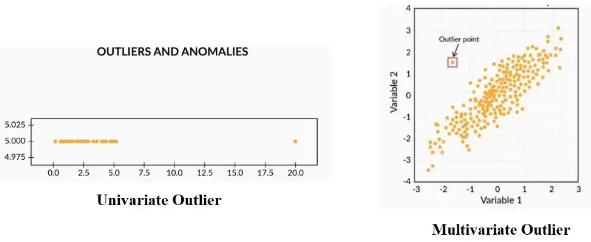

So, after understanding the causes of these outliers, we can handle them by dropping those records or imputing with the values or leaving them as is, if it makes more sense.

## Standardizing Values

To perform data analysis on a set of values, we have to make sure the values in the same column should be on the same scale. For example, if the data contains the values of the top speed of different companies’ cars, then the whole column should be either in meters/sec scale or miles/sec scale.

## Filtering
Part of data cleaning, you will need to filter or transform outliers, and these tasks is largely a matter of applying array operations. Use ```describe()``` to look at the statistics.

Notice that for '25-34' column the max value is 99. Looking at the range of values for the rest of the columns the min value is 12 and max is 50, hence 99 could probably be an outlier which warrant investigation. Let's assume that it's an outlier and the max value can only be 55, you can use array opperations to filter value the outlier.

# Exercise: Try-it-yourself
Next, let's use another dataset and perform data cleaning to get rid of irregularities and clean the data. 

We will be performing the data cleaning using the **marketing_analysis.csv** data set.

First, let's load the data.

In [ ]:
# Read the data set of "Marketing Analysis" in data.


# Printing the head of the data frame


If we observe the above dataset, there are some discrepancies in the Column header for the first 2 rows. The correct data is from the index number 1. So, we have to fix the first two rows.

This is called **Fixing the Rows and Columns**. Let’s ignore the first two rows and load the data again. Use the ```skiprows``` argument to load the data without the first two rows as it's not useful.

~~~Python
data = pd.read_csv('...', skiprows=2)
~~~

In [ ]:
# Read the file in data without first two rows as it is of no use.


#print the head of the data frame.


Now, the dataset looks like this, and it makes more sense.

Following are the steps to be taken while **Fixing Rows and Columns:

1. Delete Summary Rows and Columns in the Dataset.
2. Delete Header and Footer Rows on every page.
3. Delete Extra Rows like blank rows, page numbers, etc.
4. We can merge different columns if it makes for better understanding of the data
5. Similarly, we can also split one column into multiple columns based on our requirements or understanding.
6. Add Column names, it is very important to have column names to the dataset.

Now if we observe the above dataset, the ```customerid``` column has of no importance to our analysis, and also the ```jobedu``` column has both the information of ```job``` and ```education``` in it.

So, what we’ll do is, we’ll drop the ```customerid``` column and we’ll split the ```jobedu``` column into two other columns job and education and after that, we’ll drop the ```jobedu``` column as well.

In [ ]:
# Drop the customer id as it is of no use.


#Extract job  & Education in newly from "jobedu" column.


# Drop the "jobedu" column from the dataframe.


# Printing the head of the data frame


## Missing Values
If there are missing values in the Dataset before doing any statistical analysis, we need to handle those missing values.

There are mainly three types of missing values.

1. MCAR(Missing completely at random): These values do not depend on any other features.
2. MAR(Missing at random): These values may be dependent on some other features.
3. MNAR(Missing not at random): These missing values have some reason for why they are missing.

Let’s see which columns have missing values in the dataset.

In [ ]:
# Checking the missing values


As we can see three columns contain missing values. Let’s see how to handle the missing values. We can handle missing values by dropping the missing records or by imputing the values.

## Drop the missing Values

Let’s handle missing values in the ```age``` column by dropping records with age missing in the data dataframe and check the missing values in the dataset to verify that there's no missing values for the ```age``` column. 

In [ ]:
# Dropping the records with age missing in data dataframe.


# Checking the missing values in the dataset.


Let’s impute values to the missing values for the ```month``` column.

Since the month column is of an object type, let’s calculate the mode of that column and impute those values to the missing values.

In [ ]:
# Find the mode of month in data


# Fill the missing values with mode value of month in data.


# Let's see the null values in the month column.


Handling the missing values in the ```Response column```. Since, our target column is Response Column, if we impute the values to this column it’ll affect our analysis. So, it is better to drop the missing values from ```Response Column```.

In [ ]:
#drop the records with response missing in data.


# Calculate the missing values in each column of data frame
